In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/twitter-sentiment-analysis-hatred-speech/train.csv
/kaggle/input/twitter-sentiment-analysis-hatred-speech/test.csv


In [2]:
!pip install tweepy

In [3]:
#Importing Libraries
import tweepy
from textblob import TextBlob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud
import json
from collections import Counter

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [4]:
consumer_key = '04eTzEjvJ0K4FZB5eUEn5Qgfb'
consumer_key_secret = 'o4Fuqa89NVSvYOWK3vKJ7oqPXAqhZmGcqRN7M0p1AkaLHKlPpJ'
access_token = '1403715816999165954-wqt5iTavVY1wjvt9c7hyIm7i77fFB5'
access_token_secret = 'aVHDAnY64lC4prf4G0vvz5w6jvJ0OVOP3jadEHFEHLInv'
auth = tweepy.OAuthHandler(consumer_key, consumer_key_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, wait_on_rate_limit=True)

In [5]:
db_tweets = pd.DataFrame(columns = ['username', 'acctdesc', 'location', 'following',
                                        'followers', 'totaltweets', 'usercreatedts', 'tweetcreatedts',
                                        'retweetcount', 'text', 'hashtags']
                                    )

In [6]:
search_words='covid-19'
date_since ="2020-10-03"
numTweets = 2500
numRuns = 6

In [7]:
tweets = tweepy.Cursor(api.search, q=search_words, lang="id",since=date_since, tweet_mode='extended').items(numTweets)

In [8]:
tweet_list = [tweet for tweet in tweets]

In [9]:
noTweets = 0
for tweet in tweet_list:
    username = tweet.user.screen_name
    acctdesc = tweet.user.description
    location = tweet.user.location
    following = tweet.user.friends_count
    followers = tweet.user.followers_count
    totaltweets = tweet.user.statuses_count
    usercreatedts = tweet.user.created_at
    tweetcreatedts = tweet.created_at
    retweetcount = tweet.retweet_count
    hashtags = tweet.entities['hashtags']
    try:
        text = tweet.retweeted_status.full_text
    except AttributeError:
        text = tweet.full_text
    ith_tweet = [username, acctdesc, location, following, followers, totaltweets,
                usercreatedts, tweetcreatedts, retweetcount, text, hashtags]
    db_tweets.loc[len(db_tweets)] = ith_tweet
    noTweets += 1

In [10]:
db_tweets.head

<bound method NDFrame.head of            username                                           acctdesc  \
0           aniv_tw  Forever getting stuck in fandoms: TMI, PJO, Di...   
1          adzimzzz                                               Haii   
2         tvOneNews  Official Twitter of tvOne | Indonesia's #1 Med...   
3     taegukkie_twt                                     95'z liners 🐰🐯   
4         emyliasss  21| siang niaga popia nestum. malam mimpi main...   
...             ...                                                ...   
2495       EdaCumil  I am good, but not an angel. I do sin, but i a...   
2496    AlbertSolo2  Pancasila yess.\nI free buzzer.\npengamat poli...   
2497   YanuarAgusta  Fan of Iron Man and Roronoa Zoro. A Part time ...   
2498        aaihere                                                      
2499  KODIM0726_SKH                                                      

                     location following followers totaltweets  \
0     Petaling J

In [11]:
db_tweets["location"]

0       Petaling Jaya, Selangor
1                              
2                     Indonesia
3                              
4                            🇲🇾
                 ...           
2495           Malaysia & India
2496     Surakarta, Jawa Tengah
2497                  Indonesia
2498     Durian Tunggal, Melaka
2499    Sukoharjo, Central Java
Name: location, Length: 2500, dtype: object

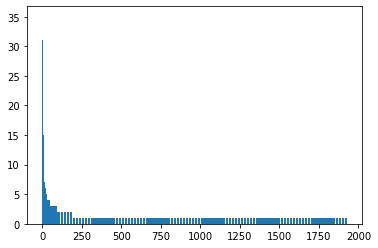

senawi7711       35
azinsah          31
PMRKotaBharu     31
been_kim         26
abidin_AGhani    24
                 ..
iqbalazhr         1
izzNauralnara     1
Titaniumnews_     1
lisalisolis       1
SasaAnuar         1
Name: username, Length: 1926, dtype: int64


In [12]:
counts =db_tweets["username"].value_counts()
plt.bar(range(len(counts)), counts)
plt.show()
print(counts)

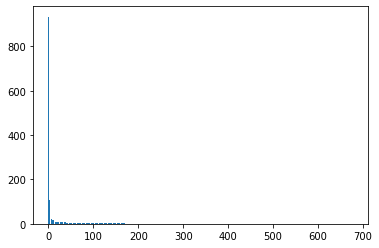

                                  934
Malaysia                          157
Indonesia                         108
Jakarta                            38
Kota Bharu, Kelantan               33
                                 ... 
Regal                               1
anotherworld                        1
Jl Jend Sudirman 52 Yogyakarta      1
ÜT: 3.165811,101.766103             1
Nilai                               1
Name: location, Length: 678, dtype: int64


In [13]:
counts =db_tweets["location"].value_counts()
plt.bar(range(len(counts)), counts)
plt.show()
print(counts)

In [14]:
corpusx = []
for i in range (0, 1000):
    tweet = re.sub('[^a-zA-Z0-9]', ' ', db_tweets['text'][i])
    tweet = tweet.lower()
    tweet = re.sub('rt', '', tweet)
    tweet = re.sub('http', '', tweet)
    tweet = re.sub('https', '', tweet)
    tweet = tweet.split()
    ps = PorterStemmer()
    tweet = [ps.stem(word) for word in tweet if not word in set (stopwords.words('english'))]
    tweet = ' '.join(tweet)
    corpusx.append(tweet)
    

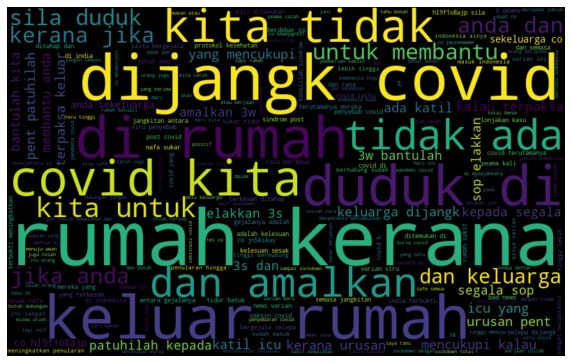

In [15]:
all_words = ' '.join([text for text in corpusx])
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)
plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()